In [1]:
library(corrplot)
library(Amelia)
library(ggplot2)

corrplot 0.84 loaded

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [2]:
data = read.csv('../../Data/birthweight_reduced.csv', stringsAsFactors=T)

In [3]:
str(data)

'data.frame':	42 obs. of  17 variables:
 $ id              : int  1313 431 808 300 516 321 1363 575 822 1081 ...
 $ headcirumference: int  12 12 13 12 13 13 12 12 13 14 ...
 $ length          : int  17 19 19 18 18 19 19 19 19 21 ...
 $ Birthweight     : num  5.8 4.2 6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 ...
 $ Gestation       : int  33 33 34 35 35 37 37 37 38 38 ...
 $ smoker          : int  0 1 0 1 1 0 1 1 0 0 ...
 $ motherage       : int  24 20 26 41 20 28 20 19 20 18 ...
 $ mnocig          : int  0 7 0 7 35 0 7 7 0 0 ...
 $ mheight         : int  58 63 65 65 67 62 64 65 62 67 ...
 $ mppwt           : int  99 109 140 125 125 118 104 132 103 109 ...
 $ fage            : int  26 20 25 37 23 39 20 20 22 20 ...
 $ fedyrs          : int  16 10 12 14 12 10 10 14 14 12 ...
 $ fnocig          : int  0 35 25 25 50 0 35 0 0 7 ...
 $ fheight         : int  66 71 69 68 73 67 73 72 70 67 ...
 $ lowbwt          : int  1 1 0 1 1 0 1 0 0 0 ...
 $ mage35          : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LowBirthWei

In [4]:
head(data)

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
2,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
3,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
4,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
5,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
6,321,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal


In [5]:
tail(data)

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
37,1764,15,22,10.0,41,1,32,12,68,154,38,14,25,71,0,0,Normal
38,553,14,21,8.6,42,0,24,0,69,143,30,12,0,72,0,0,Normal
39,1191,13,21,8.0,42,0,21,0,65,132,21,10,25,73,0,0,Normal
40,1360,13,22,10.0,44,0,20,0,63,125,23,10,35,70,0,0,Normal
41,223,13,19,8.5,45,1,28,25,64,118,30,16,0,72,0,0,Normal
42,1187,14,20,8.9,44,0,20,0,68,150,26,14,25,74,0,0,Normal


In [6]:
summary(data)

       id         headcirumference     length       Birthweight    
 Min.   :  27.0   Min.   :12.00    Min.   :17.00   Min.   : 4.200  
 1st Qu.: 537.2   1st Qu.:13.00    1st Qu.:19.00   1st Qu.: 6.450  
 Median : 821.0   Median :13.00    Median :20.00   Median : 7.250  
 Mean   : 894.1   Mean   :13.26    Mean   :19.93   Mean   : 7.264  
 3rd Qu.:1269.5   3rd Qu.:14.00    3rd Qu.:21.00   3rd Qu.: 8.000  
 Max.   :1764.0   Max.   :15.00    Max.   :22.00   Max.   :10.000  
   Gestation         smoker         motherage         mnocig      
 Min.   :33.00   Min.   :0.0000   Min.   :18.00   Min.   : 0.000  
 1st Qu.:38.00   1st Qu.:0.0000   1st Qu.:20.25   1st Qu.: 0.000  
 Median :39.50   Median :1.0000   Median :24.00   Median : 4.500  
 Mean   :39.19   Mean   :0.5238   Mean   :25.55   Mean   : 9.429  
 3rd Qu.:41.00   3rd Qu.:1.0000   3rd Qu.:29.00   3rd Qu.:15.750  
 Max.   :45.00   Max.   :1.0000   Max.   :41.00   Max.   :50.000  
    mheight         mppwt            fage          fedy

In [7]:
print(paste("cols:", ncol(data)))
print(paste("rows:", nrow(data)))

[1] "cols: 17"
[1] "rows: 42"


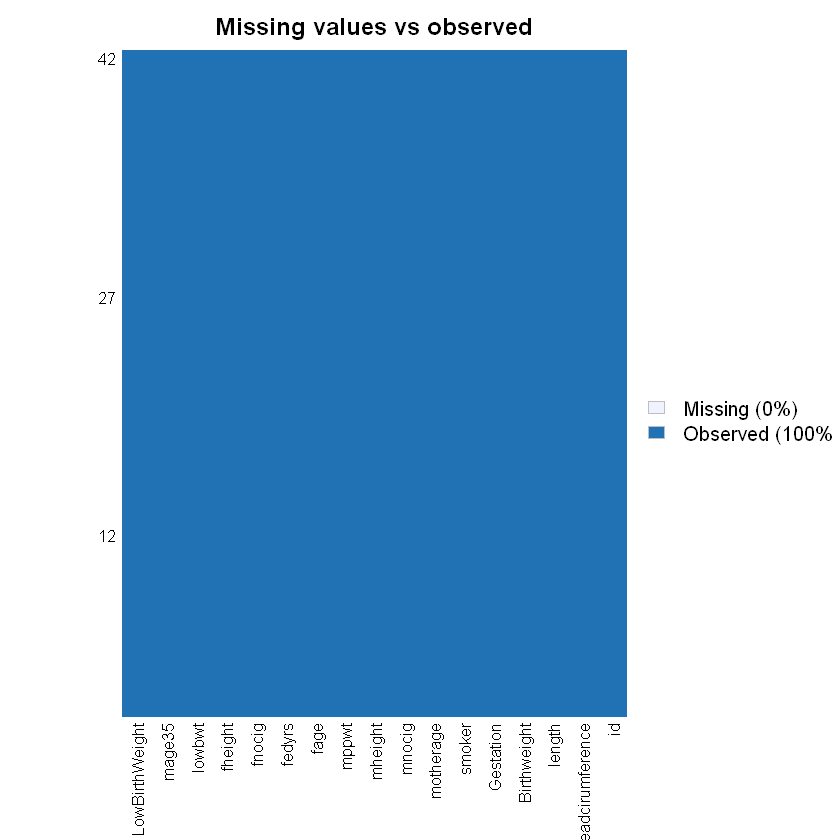

In [8]:
# Check missing value
missmap(data, main = "Missing values vs observed")

### => No missing data

In [9]:
# Check class bias
table(data$LowBirthWeight)


   Low Normal 
     6     36 

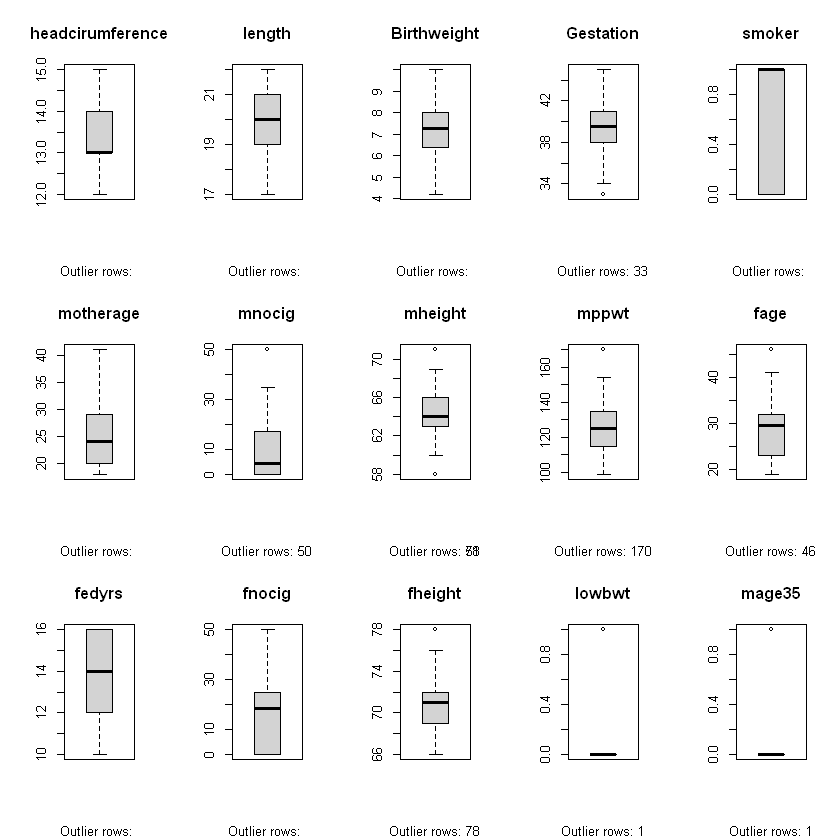

In [10]:
par(mfrow = c(3, 5))
col_index = c(2:16)

for (index in col_index){
    boxplot(data[,index], main = names(data)[index], 
        sub = paste("Outlier rows:", boxplot.stats(data[,index])$out))
}


In [11]:
print("Outliers")
outliers = list()
for (index in col_index){
    outlier = boxplot.stats(data[,index])$out
    print(paste(names(data)[index],":", sum(data[,index] == outlier[1])))
    outliers[[index]] = outlier
}

[1] "Outliers"
[1] "headcirumference : NA"
[1] "length : NA"
[1] "Birthweight : NA"
[1] "Gestation : 2"
[1] "smoker : NA"
[1] "motherage : NA"
[1] "mnocig : 1"
[1] "mheight : 1"
[1] "mppwt : 1"
[1] "fage : 1"
[1] "fedyrs : NA"
[1] "fnocig : NA"
[1] "fheight : 1"
[1] "lowbwt : 6"
[1] "mage35 : 4"


In [12]:
# Calculate the correlation between each pair of numeric variables
correlations = cor(data[, 2:16])
correlations

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
headcirumference,1.000000000,0.56532849,0.736396310,0.443974538,-0.17375085,0.112108327,-0.131437996,0.38129342,0.35759351,0.30136346,0.083416559,-0.02773428,0.040466392,-0.50024673,-0.005096869
length,0.565328491,1.00000000,0.697008279,0.651402769,-0.23534939,-0.020718949,-0.157138028,0.41473145,0.30439408,0.07890718,-0.050722880,0.01971581,0.187137302,-0.59224820,0.021074827
Birthweight,0.736396310,0.69700828,1.000000000,0.706291950,-0.30895001,0.001040475,-0.151227745,0.36794704,0.38958065,0.17679000,0.073869580,-0.08892720,0.024784274,-0.65180447,-0.108480485
Gestation,0.443974538,0.65140277,0.706291950,1.000000000,-0.09474608,0.010778455,0.043194856,0.23092930,0.25051553,0.14217533,0.130986636,-0.11383061,0.187866905,-0.60293498,0.007394508
smoker,-0.173750846,-0.23534939,-0.308950015,-0.094746078,1.00000000,0.212478786,0.727218092,0.03968201,0.01258798,0.19750145,-0.014890584,0.41763296,0.105835307,0.25301216,0.146938453
motherage,0.112108327,-0.02071895,0.001040475,0.010778455,0.21247879,1.000000000,0.340294378,0.04678404,0.27764134,0.80658442,0.441682660,0.09092664,-0.203603248,-0.07639372,0.692663889
mnocig,-0.131437996,-0.15713803,-0.151227745,0.043194856,0.72721809,0.340294378,1.000000000,0.17194248,0.15400811,0.24842538,0.198526204,0.25730739,0.008421145,0.03538366,0.290574154
mheight,0.381293418,0.41473145,0.367947042,0.230929298,0.03968201,0.046784040,0.171942477,1.00000000,0.67124662,-0.07166439,0.016249430,0.04909595,0.272823984,-0.20080064,0.108944153
mppwt,0.357593509,0.30439408,0.389580646,0.250515534,0.01258798,0.277641336,0.154008114,0.67124662,1.00000000,0.25340070,0.187700894,0.05077141,0.108319605,-0.33887910,0.147704096
fage,0.301363456,0.07890718,0.176790000,0.142175334,0.19750145,0.806584417,0.248425377,-0.07166439,0.25340070,1.00000000,0.300471472,0.13586202,-0.298559496,-0.24509537,0.351405036


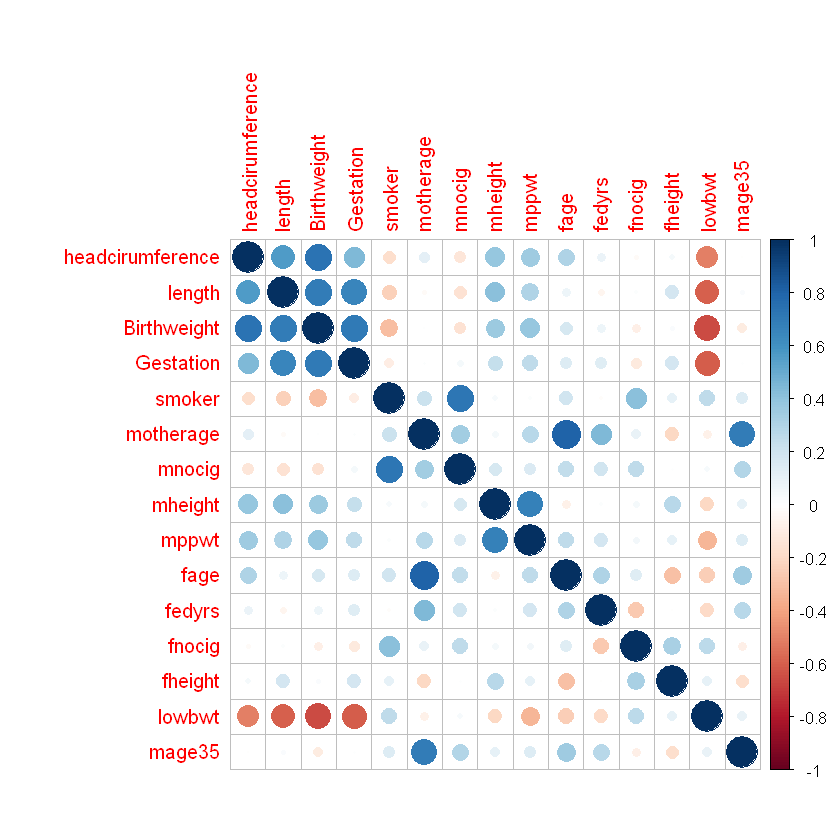

In [13]:
corrplot(correlations, method = "circle")

In [14]:
data = data[, 2:17]
head(data)

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
2,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
3,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
4,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
5,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
6,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal


In [15]:
as.factor(data$LowBirthWeight)

[1] Low    Low    Normal Low    Low    Normal Low    Normal Normal Normal
[11] Normal Normal Normal Normal Normal Normal Normal Normal Low    Normal
[21] Normal Normal Normal Normal Normal Normal Normal Normal Normal Normal
[31] Normal Normal Normal Normal Normal Normal Normal Normal Normal Normal
[41] Normal Normal
Levels: Low Normal

In [16]:
# Create training and test data samples from orginal data
set.seed(42) # Setting seed to reproduce results of ramdom sampling
trainingRowIndex = sample(1: nrow(data), 0.7 * nrow(data))
trainingData = data[trainingRowIndex, ]
testData = data[- trainingRowIndex,]

print(nrow(trainingData))
print(nrow(testData))

[1] 29
[1] 13


In [17]:
# estimate a logistic regression model using the glm (generalized linear model) function
mylogit = glm(LowBirthWeight ~ ., data = trainingData, family = "binomial")

In [18]:
# Review dianostic measures
print(summary(mylogit))


Call:
glm(formula = LowBirthWeight ~ ., family = "binomial", data = trainingData)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.971e-06   3.971e-06   3.971e-06   3.971e-06   3.971e-06  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       2.557e+01  2.645e+06       0        1
headcirumference  1.181e-06  1.089e+05       0        1
length            3.585e-08  1.016e+05       0        1
Birthweight      -4.277e-07  8.047e+04       0        1
Gestation         5.549e-08  2.744e+04       0        1
smoker           -6.965e-07  1.617e+05       0        1
motherage        -4.065e-08  2.026e+04       0        1
mnocig           -1.736e-08  8.064e+03       0        1
mheight          -2.764e-07  3.216e+04       0        1
mppwt             5.649e-09  4.053e+03       0        1
fage             -1.316e-07  1.675e+04       0        1
fedyrs            2.586e-07  3.042e+04       0        1
fnocig            5.532e-08  3

In [19]:
pred = predict(mylogit, newdata = testData, type = "response")
pred_value = ifelse(pred > 0.5, "Normal", "Low")
print("Test data adimit vs predict (10 rows):")
result = data.frame(Actual = testData$LowBirthWeight, pred_value)
print(result)

[1] "Test data adimit vs predict (10 rows):"
   Actual pred_value
6  Normal     Normal
12 Normal     Normal
16 Normal     Normal
17 Normal     Normal
19    Low        Low
21 Normal     Normal
23 Normal     Normal
28 Normal     Normal
30 Normal     Normal
31 Normal     Normal
32 Normal     Normal
35 Normal     Normal
38 Normal     Normal


In [20]:
misClasificError = mean(pred_value != testData$LowBirthWeight)
print(paste("Accuracy:", 1 - misClasificError))

[1] "Accuracy: 1"


In [21]:
name_lst = names(testData[1:15])

In [22]:
sample_frame = data.frame(matrix(0, nrow = 0, ncol = 15,
           dimnames = list(NULL, paste0("ColumnName_", 1:15))) )

In [23]:
sample = list(12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1 ,1)

In [24]:
sample_frame = data.frame(sample)
sample_frame[1, ] = sample
names(sample_frame) = name_lst

In [25]:
y1 = predict(mylogit, newdata = sample_frame, type = 'response')
result = ifelse(y1 > 0.5, "Normal", "Low")
print(result)

    1 
"Low" 
